In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_blobs, make_circles
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(n_samples=100, centers=[(0,3),(3,3),(3,0)], 
                                      n_features=2, random_state=42,
                                      cluster_std=(0.9,0.9,0.9))

Text(0, 0.5, 'X2')

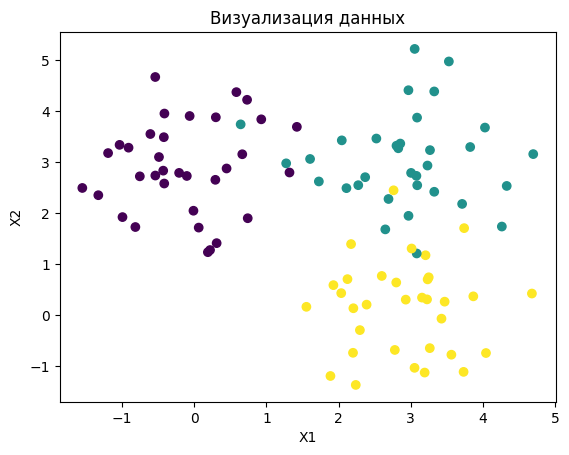

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Визуализация данных')
plt.xlabel('X1')
plt.ylabel('X2')

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [12]:
depth=2
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth, 
                                  random_state=42)
clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

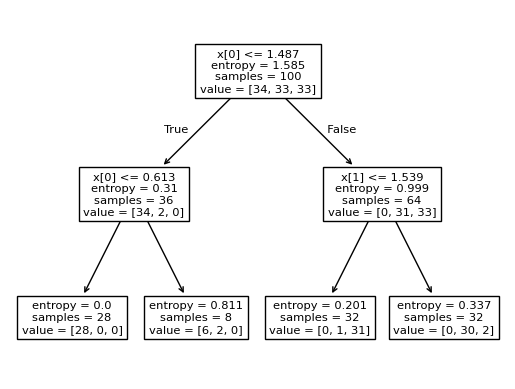

In [13]:
plot_tree(clf_tree) 
plt.show()

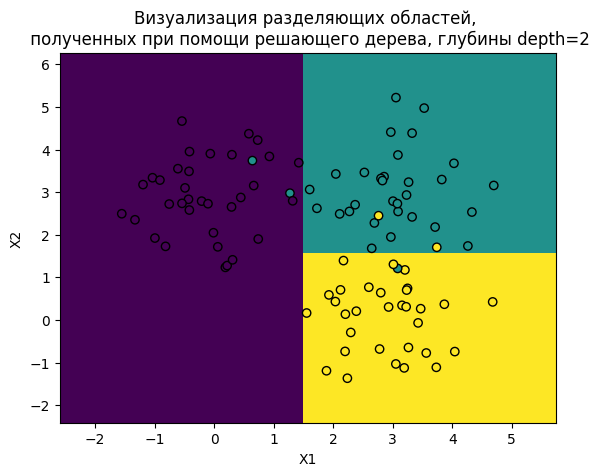

In [14]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [16]:
y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy =', accuracy_score(y, y_pred))
print('F1_score =', f1_score(y, y_pred, average='micro'))

[[34  0  0]
 [ 2 30  1]
 [ 0  2 31]]
Accuracy = 0.95
F1_score = 0.95


In [25]:
observation_new = [[2, 2]]

In [26]:
clf_tree.predict(observation_new)

array([1])

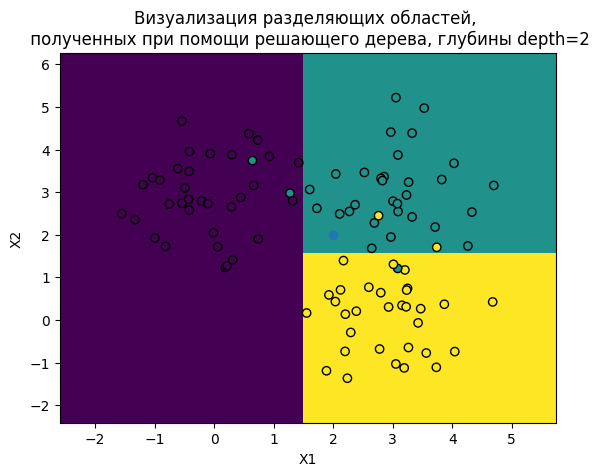

In [27]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.scatter(observation_new[0][0], observation_new[0][1])

plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [28]:
n_samples = 100
X = np.sort(np.random.rand(n_samples))
y = np.exp(X ** 2)+np.random.normal(0.0, 0.1, X.shape[0])

In [37]:
X.reshape((-1,1)).shape

(100, 1)

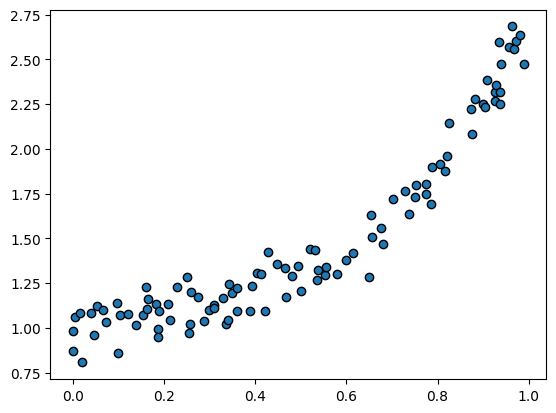

In [38]:
plt.scatter(X, y,  edgecolors='black',linewidth=1)

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
depth=3
reg_tree = DecisionTreeRegressor(max_depth=depth, random_state=1)
reg_tree.fit(X.reshape((-1,1)), y)

DecisionTreeRegressor(max_depth=3, random_state=1)

In [70]:
X_synth = np.linspace(0, 1, 20).reshape((-1,1))
y_pred_reg = reg_tree.predict(X_synth)

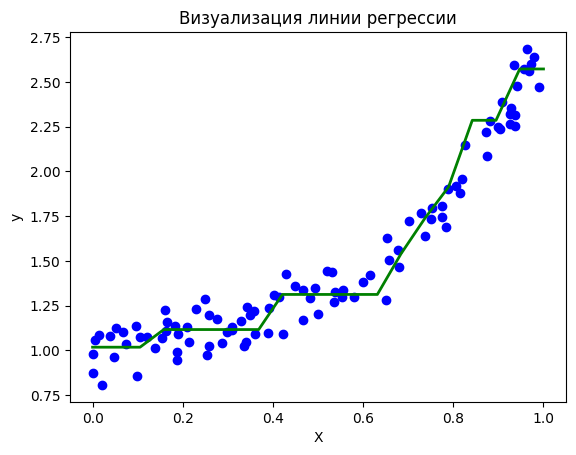

In [71]:
plt.scatter(X, y, c="b")

plt.plot(X_synth, y_pred_reg, "g", lw=2)

plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y');

In [72]:
from sklearn.metrics import r2_score, mean_squared_error

In [79]:
y_pred = reg_tree.predict(X.reshape((-1, 1)))

In [80]:
print('r2= ', r2_score(y, y_pred))
print('MSE= ', mean_squared_error(y, y_pred))

r2=  0.9709432004801698
MSE=  0.007645793892897106


In [81]:
observation_new = [[0.7]]

In [82]:
reg_tree.predict(observation_new)

array([1.73713383])

#### Задания для самостоятельного выполнения

1. Загрузите встроенные данные sklearn.datasets.load_iris, взяв только последние два столбца (длина и ширина лепестков). Изобразите их на диаграмме рассеяния, подкрасив каждый класс некоторым цветом.
1. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева принятия решений.
1. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier с разными глубинами (1, 2, 3, 4, 10), используя энтропию, и визуализируйте в каждом случае полученные разделяющие области.
1. Выведите необходимые метрики для оценки работы моделей с разными глубинами. Сделайте вывод о том, какая модель лучше классифицирует данные.
1. Загрузите весь датасет load_iris. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева решений. Оцените качество работы модели.
1. Загрузите встроенные данные sklearn.datasets.california_housing, взяв только столбец AveBedrms в качестве единственного признака. Изобразите данные на диаграмме рассеяния так, чтобы на одной оси были отмечены значения признака, а на другой - целевой переменной.
1. Обучите модель регрессионного дерева принятия решений sklearn.tree.DecisionTreeRegressor, зафиксировав random_state=0, а остальными гиперпараметрами по умолчению.
1. Визуализируйте соответствующий граф дерева решений и получившуюся кусочную линию регрессии.
1. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.
1. Загрузите весь датасет fetch\_california\_housing. Обучите ту же модель. Визуализируйте соответствующий граф дерева решений и оцените качество работы модели.